### Урок 3. Классификация. Логистическая регрессия

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2,  1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [3]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [4]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [5]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [6]:
X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

In [7]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  2.        ,  5.        ,  3.        ,
         0.        ,  5.        , 10.        ,  1.        ,  2.        ],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  2.        ,
         1.        ,  3.        ,  3.        ,  1.        ,  2.        ]])

In [19]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [20]:
# Пример применения
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

In [10]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [11]:
z = np.linspace(-10, 10, 101)

In [12]:
probabilities = sigmoid(z)

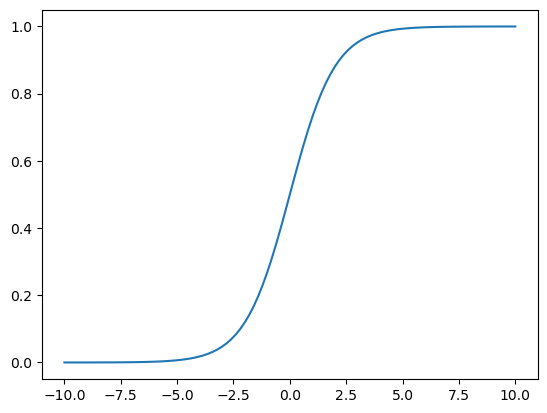

In [13]:
plt.plot(z, probabilities)
plt.show()

In [14]:
Logistic Regression

SyntaxError: invalid syntax (4094908863.py, line 1)

In [73]:
def eval_model(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [74]:
W = eval_model(X_st, y, iterations=5000, alpha=1e-4)

500 [ 0.47822106 -0.20918419  0.64605995  1.49531432] 1.0559639161585663
1000 [ 0.46074241 -0.27647603  0.64395686  1.46891696] 0.945214871179169
1500 [ 0.44435675 -0.33951515  0.64152026  1.44406912] 0.8478360281905125
2000 [ 0.42913461 -0.39751872  0.63899625  1.42106251] 0.7651177745022372
2500 [ 0.41513888 -0.44956784  0.63671032  1.40023024] 0.6981293270105478
3000 [ 0.40240136 -0.49488241  0.63498247  1.38184975] 0.6468813805442176
3500 [ 0.39088925 -0.53321212  0.63401986  1.36601535] 0.6097021563515638
4000 [ 0.38049869 -0.56497213  0.63387116  1.35259671] 0.5836774145473647
4500 [ 0.37108342 -0.59102182  0.63446603  1.3413119 ] 0.5657147376221167
5000 [ 0.36249064 -0.61234585  0.63568321  1.33183158] 0.5532737788236778


## Практическое задание

1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.
2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred_proba.
4. Создайте функцию calc_pred, возвращающую предсказанный класс. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred.
5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?

### 1. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [186]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    err = np.sum(err)
    return err

In [266]:
from functools import reduce

def calc_logloss_2(y, y_pred):
    err_list = []
    for y_preds in y_pred:
        if  y_preds == 0.0:
            err = - np.mean(y * np.log(1e-6) + (1.0 - y) * np.log(1.0 - y_preds))
        elif y_preds == 1.0:
            err = - np.mean(y * np.log(y_preds) + (1.0 - y) * np.log(1.0 - (1-1e-6)))
        else:
            err = - np.mean(y * np.log(y_preds) + (1.0 - y) * np.log(1.0 - y_preds))
        err_list.append(err)
    return sum(err_list)

In [267]:
y1 = np.array([1, 0, 1, 0])
y_pred1 = np.array([0, 0.1, 1, 1])
calc_logloss_2(y1, y_pred1)

21.92723864124359

In [282]:
def calc_logloss_3(y, y_pred):
    for y_preds in y_pred:
        if  y_preds == 0.0:
            err = - np.mean(y * np.log(1e-6) + (1.0 - y) * np.log(1.0 - 1e-6))
        elif y_preds == 1.0:
            err = - np.mean(y * np.log((1-1e-6)) + (1.0 - y) * np.log(1.0 - (1-1e-6)))
        else:
            err = - np.mean(y * np.log(y_preds) + (1.0 - y) * np.log(1.0 - y_preds))
        yield err

In [283]:
from functools import reduce
err_list = []
for el in calc_logloss_3(y1, y_pred1):
    err_list.append(el)
a = reduce(lambda x,y: x + y, err_list)
a


21.92724014124434

оптимизируем запуск избавимся от промежуточной структуры (списка)

In [270]:
from functools import reduce
a = calc_logloss_3(y1, y_pred1)
b = reduce(lambda x,y: x + y, a)
b

21.92723864124359

In [271]:
calc_logloss_2(y1, y_pred1)

21.92723864124359

In [280]:
def calc_logloss_4(y, y_pred):
    min_value = 1e-6
    max_value = 1-1e-6
    y_pred = np.clip(y_pred, min_value, max_value) # clip заменит в масиве y_pred все максимальные и мин значения
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [281]:
calc_logloss_4(y1, y_pred1)

6.93409565788953

In [279]:
y_pred1, y

(array([0. , 0.1, 1. , 1. ]), array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]))

### 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.


In [242]:
def eval_model_2(X, y, iterations, alpha=1e-4):
    err_dict = {}
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss_4(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            #print(f'\tитерация - {i}\n\tвеса - {W}\n\tошибка - {err}')
            err_dict[i] = err 
    return W, err_dict

In [243]:
alphas = np.arange(1e-4, 1e-2, 1e-4)

for alpha in alphas:
    print('АЛЬФА - ', alpha)
    W, err_list = eval_model_2(X, y, 100, alpha)
    print(err_list)

АЛЬФА -  0.0001
{10: 4.605220188488314, 20: 4.605220188488258, 30: 1.095896023553595, 40: 2.2677993084247836, 50: 1.5684748329774734, 60: 1.3356515644399312, 70: 2.2491276481764615, 80: 1.3681553672626143, 90: 1.4797546793098797, 100: 1.082463834863993}
АЛЬФА -  0.0002
{10: 4.605222375189453, 20: 4.605220188488314, 30: 4.605220188488258, 40: 1.181368988942523, 50: 4.605220188488258, 60: 4.36155333650394, 70: 4.605220188488314, 80: 4.605220188488314, 90: 4.605220188488314, 100: 0.9280796811489094}
АЛЬФА -  0.00030000000000000003
{10: 3.0723382159453942, 20: 4.605220188488314, 30: 4.605220188488258, 40: 4.579435663680398, 50: 4.605220188488314, 60: 4.605220188488314, 70: 4.605220188488258, 80: 4.605220188488314, 90: 4.605220188488314, 100: 4.605220188488258}
АЛЬФА -  0.0004
{10: 4.605220188488314, 20: 4.605220188488258, 30: 4.605220188488314, 40: 4.605220188488314, 50: 4.605220188488258, 60: 4.605220188488314, 70: 4.605220188488314, 80: 4.605220188488258, 90: 4.110419022169256, 100: 4.60

C:\Users\user\AppData\Local\Temp\ipykernel_13148\2870899410.py:2: RuntimeWarning: overflow encountered in exp
  res = 1 / (1 + np.exp(-z))


{10: 4.605220188488258, 20: 4.605220188488314, 30: 4.605220188488314, 40: 4.605220188488258, 50: 4.605220188488314, 60: 4.605220188488314, 70: 4.605220188488258, 80: 4.605220188488258, 90: 4.605220188488314, 100: 4.605220188488314}
АЛЬФА -  0.0055000000000000005
{10: 4.605220188488258, 20: 4.605220188488314, 30: 4.605220188488314, 40: 4.605220188488258, 50: 4.60522759749748, 60: 4.605220188488314, 70: 4.605220188488258, 80: 4.605220188488258, 90: 4.605220188488314, 100: 4.605220188488314}
АЛЬФА -  0.005600000000000001
{10: 4.605220188488258, 20: 4.605220188488314, 30: 4.605220188488314, 40: 4.605220188488258, 50: 2.554532403912507, 60: 4.605220188488314, 70: 4.605220188488258, 80: 4.605220188488258, 90: 4.605220188488314, 100: 4.605220188488314}
АЛЬФА -  0.0057
{10: 4.605220188488258, 20: 4.605220188488314, 30: 4.605220188488314, 40: 4.605220188488258, 50: 2.5565047732053734, 60: 4.605220188488314, 70: 4.605220188488258, 80: 4.605220188488258, 90: 4.605220188488314, 100: 4.605220188488


АЛЬФА -  0.005
20 итерация : 0.0,

In [200]:
def eval_model_3(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss_4(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(f'\tитерация - {i}\n\tвеса - {W}\n\tошибка - {err}')       
    return W

In [201]:
alphas = np.arange(1e-4, 1e-3, 2e-4)

for alpha in alphas:
    print('АЛЬФА - ', alpha)
    print(eval_model_3(X, y, 100, alpha))

АЛЬФА -  0.0001
	итерация - 10
	веса - [ 0.49621415 -0.1399643   0.18768854  1.52232986]
	ошибка - 4.605220188488314
	итерация - 20
	веса - [ 0.49601522 -0.14076209  0.02079394  1.52214096]
	ошибка - 4.605220188488258
	итерация - 30
	веса - [ 0.49599201 -0.14100143  0.03290748  1.52225969]
	ошибка - 1.095896023553595
	итерация - 40
	веса - [ 0.4959616  -0.14125116  0.04100304  1.52236992]
	ошибка - 2.2677993084247836
	итерация - 50
	веса - [ 0.49591379 -0.14152842  0.03839007  1.52245781]
	ошибка - 1.5684748329774734
	итерация - 60
	веса - [ 0.49586759 -0.14180411  0.03634147  1.52254716]
	ошибка - 1.3356515644399312
	итерация - 70
	веса - [ 0.49583107 -0.14206272  0.04097568  1.52265001]
	ошибка - 2.2491276481764615
	итерация - 80
	веса - [ 0.49578098 -0.14234415  0.03668826  1.52273456]
	ошибка - 1.3681553672626143
	итерация - 90
	веса - [ 0.49573935 -0.14261192  0.03771909  1.52283015]
	ошибка - 1.4797546793098797
	итерация - 100
	веса - [ 0.49569026 -0.14289511  0.03266038  1.52291

C:\Users\user\AppData\Local\Temp\ipykernel_13148\2870899410.py:2: RuntimeWarning: overflow encountered in exp
  res = 1 / (1 + np.exp(-z))


### 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred_proba.


In [205]:
def calc_pred_proba(W, X):
    z = np.dot(W,X)
    return 1/(1 + np.exp(-z))

In [208]:
W = eval_model_3(X_st, y, iterations=1000, alpha=0.05)

	итерация - 100
	веса - [ 0.03974726 -0.72084915  0.85979196  1.32730411]
	ошибка - 0.4911008591607124
	итерация - 200
	веса - [-0.16727141 -0.75381664  0.95270915  1.46373569]
	ошибка - 0.47653925060904534
	итерация - 300
	веса - [-0.33573187 -0.79030581  0.98305628  1.61023041]
	ошибка - 0.46607452146734163
	итерация - 400
	веса - [-0.49178756 -0.82131635  0.98698851  1.74755544]
	ошибка - 0.45721803762763047
	итерация - 500
	веса - [-0.64199475 -0.84624733  0.9762585   1.87356706]
	ошибка - 0.44937113989431854
	итерация - 600
	веса - [-0.78810461 -0.86605551  0.95587696  1.98958492]
	ошибка - 0.44224028573981355
	итерация - 700
	веса - [-0.93066406 -0.88178919  0.92863523  2.09729798]
	ошибка - 0.4356517806564085
	итерация - 800
	веса - [-1.06990258 -0.89432186  0.8963837   2.19815938]
	ошибка - 0.42949606132400825
	итерация - 900
	веса - [-1.20595847 -0.90434213  0.860462    2.29333014]
	ошибка - 0.4237008200431848
	итерация - 1000
	веса - [-1.33893968 -0.91238816  0.82188129  2.38

In [209]:
calc_pred_proba(W, X_st)

array([0.33789083, 0.41733688, 0.77248056, 0.01547758, 0.81704525,
       0.67877957, 0.89474512, 0.17160336, 0.31919893, 0.8383648 ])

### 4. Создайте функцию calc_pred, возвращающую предсказанный класс. На вход подаётся W, который уже посчитан функцией eval_model, и X, на выходе — массив y_pred.

In [210]:
def calc_pred(W, X, treshold = 0.5):
    y_pred = calc_pred_proba(W, X)
    y_pred = np.where(y_pred > treshold, 1, 0 )
    return y_pred

In [211]:
y_pred = calc_pred(W, X_st)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1])

### 5 Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [212]:
accuracy = np.sum(y_pred)/y_pred.shape[0] # точность - сумма всех верных положительных и всех верных отрицательных 
#класификаций деленная на все класификации OSR (Acuracuty )=(TP+TN)/(TP+TN+FP+FN)
accuracy

0.5

In [235]:
y_pred = y_pred.astype(np.float32)
y_pred, y

(array([0., 0., 1., 0., 1., 1., 1., 0., 0., 1.], dtype=float32),
 array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]))

In [250]:
def conf_matrix_for_binar_classification(y, y_pred):
    true_positive = 0
    false_positive = 0
    false_negtive = 0
    true_negative = 0 # 0 отрицательный класс 1 положительный 
    for i in range(len(y)):
        if y_pred[i] == y[i] and y_pred[i] == 1:
            true_positive +=1
        elif y_pred[i] == y[i] and y_pred[i] == 0:
            true_negative +=1
        elif y_pred[i] != y[i] and y_pred[i] == 1:
            false_positive +=1
        else:
             false_negtive += 1
    return np.array([
        [true_positive, false_negtive],
        [false_positive, true_negative]
    ])



In [251]:
conf_matrix = conf_matrix_for_binar_classification(y, y_pred)
conf_matrix

array([[4, 1],
       [1, 4]])

In [248]:
precition = conf_matrix[0,0]/(conf_matrix[1,1] + conf_matrix[0,1]) # прецезионность Precision= TP/(TP+FP)



0.8

In [284]:
recall = conf_matrix[0,0]/(conf_matrix[1,1] + conf_matrix[1,0]) # полнота специфичность TP/(TP+FN)
recall




0.8

In [285]:
F_1 = 2 * precition * recall / (precition + recall)
round(F_1,2)

0.8

#### Мы расчитывали точность и полноту для 1 класа (положительного),  метрики совпадуут и для  0 класа (отрицательного)

### 6. Могла ли модель переобучиться? Почему?

Да могла. если размер тест выборки маленький, выбры в данных, существенная кореляция признаков между собой  могло поспособствовать переобучению модели.